# Predicting Bangaluru Housing Price - Regression Model

In [1]:
#Importing other necessary libraries.
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (22,12)
import seaborn as sns
sns.style="darkgrid"

In [2]:
# Loading the dataset and storing it into the dataframe df.
df = pd.read_csv('Bengaluru_House_Data.csv')
pd.options.display.max_columns = 30

## About the Dataset

What are the things that a potential home buyer considers before purchasing a house? The location, the size of the property, vicinity to offices, schools, parks, restaurants, hospitals or the stereotypical white picket fence? What about the most important factor — the price?

Now with the lingering impact of demonetization, the enforcement of the Real Estate (Regulation and Development) Act (RERA), and the lack of trust in property developers in the city, housing units sold across India in 2017 dropped by 7 percent. In fact, the property prices in Bengaluru fell by almost 5 percent in the second half of 2017, said a study published by property consultancy Knight Frank.
For example, for a potential homeowner, over 9,000 apartment projects and flats for sale are available in the range of ₹42-52 lakh, followed by over 7,100 apartments that are in the ₹52-62 lakh budget segment, says a report by property website Makaan. According to the study, there are over 5,000 projects in the ₹15-25 lakh budget segment followed by those in the ₹34-43 lakh budget category.

Buying a home, especially in a city like Bengaluru, is a tricky choice. While the major factors are usually the same for all metros, there are others to be considered for the Silicon Valley of India. With its help millennial crowd, vibrant culture, great climate and a slew of job opportunities, it is difficult to ascertain the price of a house in Bengaluru.

### Reference Kaggle Description of - https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data

# Exploratory Data Analysis and Cleaning the Data.

EDA is the most crucial part. It's the first look at our data with the help of data visualization and descriptive statistics. We need to do it carefully in order to identify and eliminate outliers and missing values. Data Cleaning goes hands in hand with EDA. We'll proceed with our EDA in the upcoming cell blocks.

The very first steps are getting an overall view of our DataFrame. We do it by calling the .info() and .describe() methods on our dataframe.

In [3]:
# Checking the Info of our dataframe.
# Describing our Dataset
df.info()
# We get to see the column names along with the number of non-null values and their coressponding datatypes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
# Quick data description.
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
# Checcking for null values. The society column has a lot of null values. Other one is Balcony.
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
# Checking the head of the dataframe.
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [7]:
#Initial Shape of the DataFrame.
df.shape

(13320, 9)

In [8]:
# Displaying the column names for the dataframe.
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [9]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [10]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [11]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [12]:
df['availability'].nunique()

81

In [13]:
df['location'].nunique()

1305

In [14]:
df['size'].nunique()

31

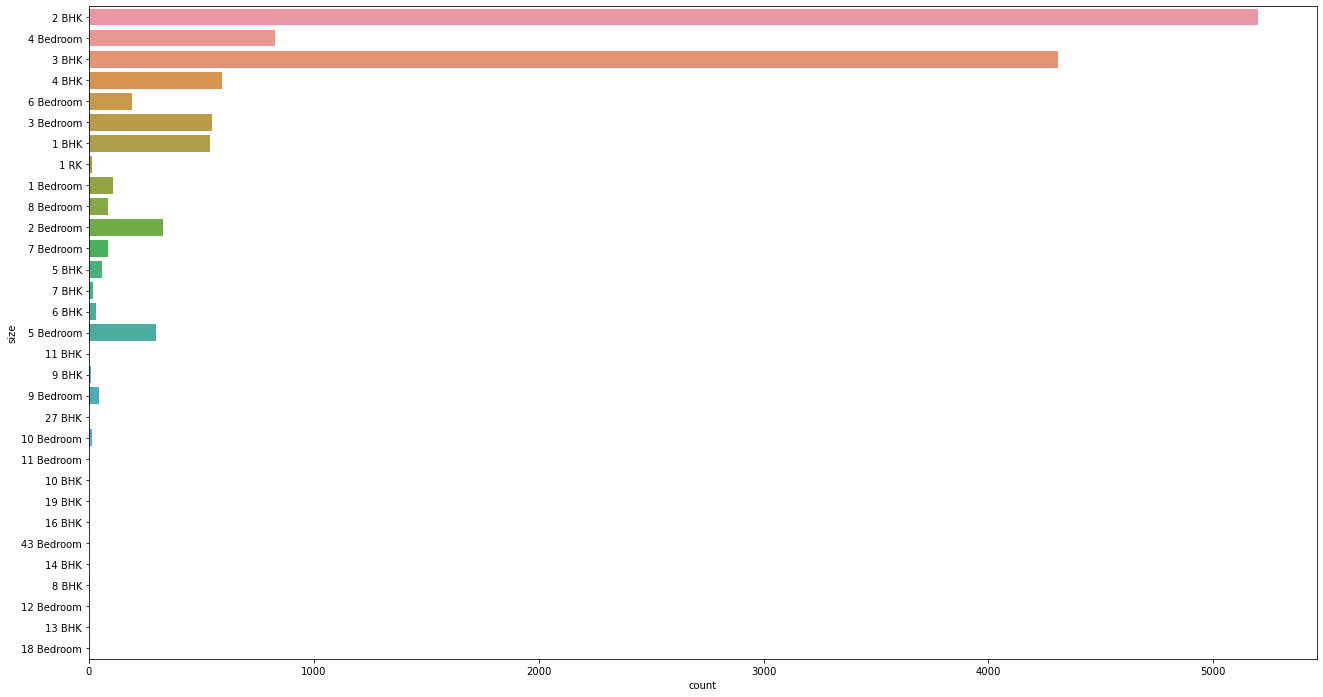

In [15]:
ax = sns.countplot(y="size", data=df)
# Have a quick look at the current dataset and the counts of the various categories listed in the size column.

In [16]:
df['society'].nunique()

2688

In [17]:
df['total_sqft'].nunique()

2117

In [18]:
df['bath'].nunique()

19

In [19]:
df['bath'].value_counts()

2.0     6908
3.0     3286
4.0     1226
1.0      788
5.0      524
6.0      273
7.0      102
8.0       64
9.0       43
10.0      13
12.0       7
13.0       3
11.0       3
16.0       2
27.0       1
18.0       1
40.0       1
15.0       1
14.0       1
Name: bath, dtype: int64

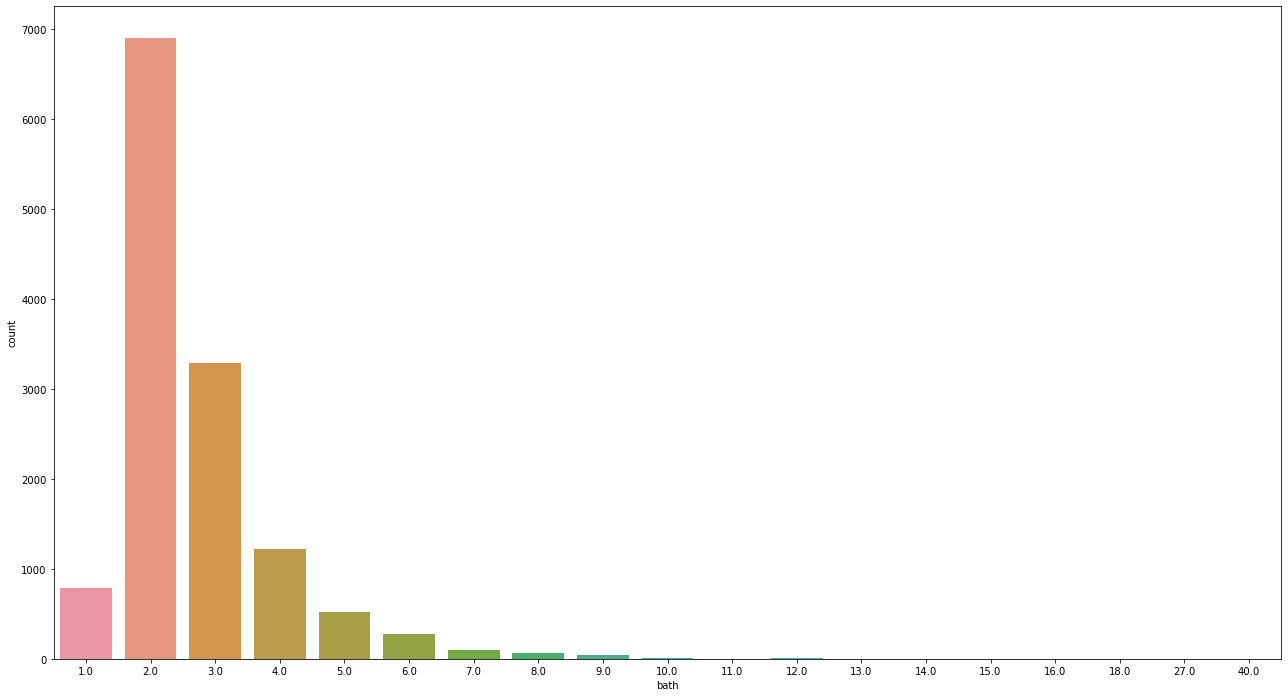

In [20]:
ax = sns.countplot(x="bath", data=df)
# Bath is set as float we need to convert it to string. Nevertheless we find the mode is in 2bathrooms.
# There are some big outliers and need to be taken care of.

In [21]:
df['balcony'].nunique()

4

In [22]:
df['balcony'].value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

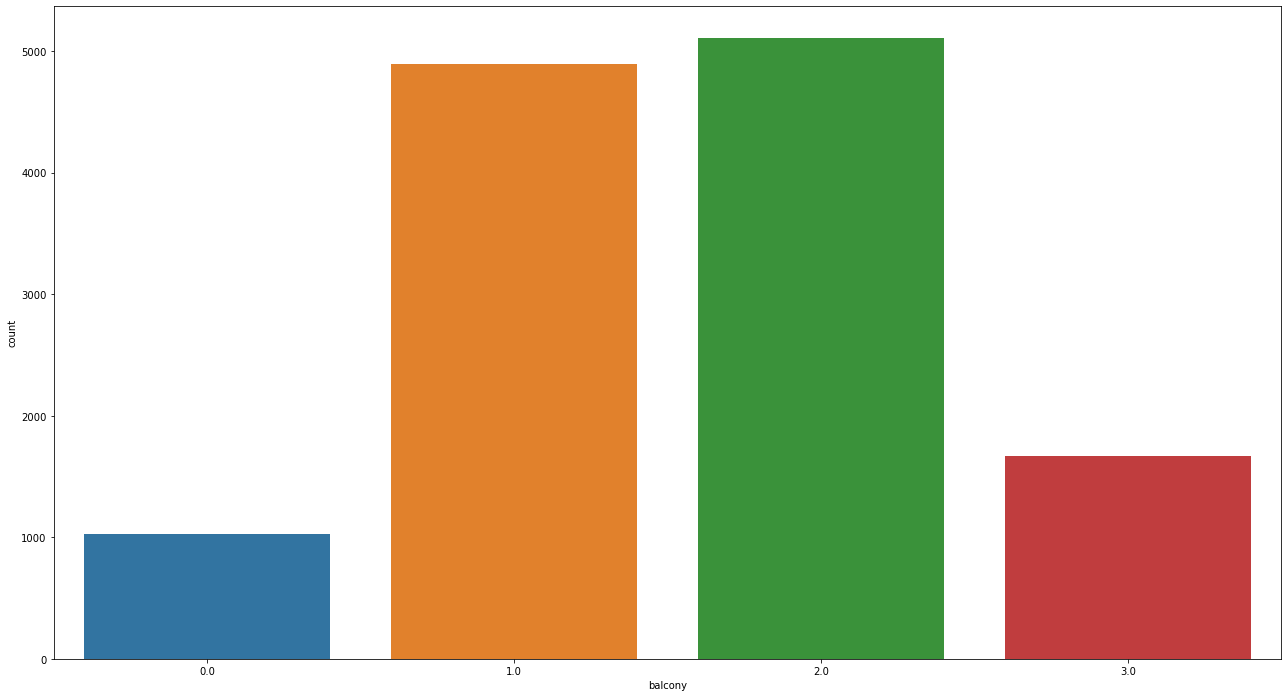

In [23]:
ax = sns.countplot(x="balcony", data=df)

We are dropping the 
society column - too many unique values compared to dataset. No problem if we drop it.
availability column - too many unique values compared to dataset. No problem if we drop it.
area_type - No use for our analysis.
balcony Not much use for our analysis. Might consider in case of different results.

In [24]:
# Dropping non-essential columns from the dataframe and storing it in df1. Keeping the original dataframe intact.
df1=df.drop(['society','availability','area_type','balcony'],axis = 'columns')
df1.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [25]:
df1.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price'], dtype='object')

In [26]:
# Checking Null values in the existing data in the dataframe.
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [27]:
# Since very few NA values we are simply dropping those values from our data.
df2=df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [28]:
# Cheking shape after dropping nulls.
df2.shape

(13246, 5)

In [29]:
# Checking Unique values in the size Column.
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [30]:
# Creating a new column 'BHK' by extracting essential information about BHK in the 'size' column.
# THis is fr easier analysis of critical information from our dataset.
df2['BHK']=df2['size'].apply(lambda x : int(x.split()[0]))

<ipython-input-30-a80324fcbc7c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK']=df2['size'].apply(lambda x : int(x.split()[0]))


In [31]:
# Head of the new dataframe.
df2.head(5)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [32]:
# Checking the unique values in the 'BHK' column.
# With just a look we are able to see big outliers such as 43 bedrooms and 27 bedrooms. Might be anomalous if not also
# These are outliers.
df2['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [42]:
# Checking for those entries which have more than 10 bedrooms. Very few of them.
len(df2[df2['BHK']>10])

12

In [43]:
# Just 12 entries have 10 or more bedrooms. Very small proportion of our dataset. Can be easily dropped.
len(df2[df2.BHK>10])

12

In [44]:
df2.total_sqft.unique()
# The array of unique values in the total_sqft column.

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [45]:
df2.total_sqft.nunique()
# Number of unique values in the total_sqft column.
# Huge number of square foot values. We can replace them with some measure of central tendency like mean of the ranged extremes.

2067

In [46]:
# Functon for identifying proper float values and tackling with improper float values.
def is_float(num):
    try:
        float(num)
    except:
        return False
    return True

In [47]:
#Tackling those values that aren't a proper float type number i.e uncleaned data with values as range or different unit
#data, misentered data etc.
#Incoming data that is unstructured.

df2[~df2['total_sqft'].apply(is_float)].head(10)

# We see many range values in the output, so we have to replace these range values with their average in order to make them proper
# float type and also usable.

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [48]:
# We see there are 173 such ranged entries. We need to tackle these.
df2[~df2['total_sqft'].apply(is_float)]['total_sqft'].nunique()

173

In [49]:
#User Defined Function that takes range value and returns the average of the range. This will be used in the total square_feet column in order
#Convert the range of square feets in the the average of the two.

def convertion_of_square_feet_to_numerical_values(sqft):
    tokens = sqft.split('-')   #Splits the characters on '-'.
    if len(tokens)==2: 
        return (float((float(tokens[0])+float(tokens[1]))/2))
    try:
        return float(sqft)
    except:
        return None

In [50]:
# Testing the Function - 1
convertion_of_square_feet_to_numerical_values('1156 - 2278') # We give range as an Input and get float as an output.

1717.0

In [51]:
# Testing the Function - 2
convertion_of_square_feet_to_numerical_values('1015 - 1510')

1262.5

In [52]:
# Testing the Function - 3
convertion_of_square_feet_to_numerical_values('3090 - 5002')

4046.0

In [53]:
#applying the function to the copy of the above dataframe denoted by df3. And then displaying it's head.
df3=df2.copy()
df3['total_sqft'] = df3['total_sqft'].apply(convertion_of_square_feet_to_numerical_values)
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [54]:
# Observing a few entries inside the dataframe and displaying it as a sub-dataframe
# The 30th, 78th and 122nd examples are displayed.
# .loc() function helps us in accessing row wise examples from our dataframe.

df3.loc[[30, 378, 1322]]

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2475.0,4.0,186.00,4
378,Electronic City,3 BHK,1800.0,3.0,95.00,3
1322,Kothannur,3 BHK,1275.0,2.0,43.85,3


# Feature Engineering Begins
Feature Engineering is a process of using domain knowledge, skills and experiences to extract useful data from raw data in the data mining process. It's very essential for improvement in the process of our machine learning algorithms. It is called applied Machine Learning in some places.

Process of Feature Engineering - 

1. Brainstroming on the testing features.
2. Deciding what features we should create and what we should omit.
3. Creating new features.
4. Checking how the features might work with our model.
5. Improving the existing features.
6. Iteratively follow the above process till satisfactory results are reached.

In [55]:
df3.head(5)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [56]:
# Price per squarefoot is a very important feature in Real Estate business.
# We have to remove outliers based on invalid Price per square foot data.
# The Prices are in lakhs so multiplying by 100000(1Lakh).

df4=df3.copy()
df4['Price_Per_sqft'] = df4['price']*100000/df4['total_sqft']
df4.head(5)

,location,size,total_sqft,bath,price,BHK,Price_Per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


### Dealing with Dimensionality Curse

In [57]:
#Dimensionality Curse
len(df4.location.unique()) # Unique values of Location

1304

In [58]:
df4.location = df4.location.apply(lambda x : x.strip()) #Strips external spaces in the location data
location_stats = df4.groupby('location')['location'].agg('count').sort_values(ascending = False)
location_stats
# We display in ascending order and find there are many locations in the very end having only single entries.
# We need to combine them under one location name and deal with sparse data and reduce complexity.

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [59]:
#Any Location which has less than 10 houses call it other location. Putting them under the same Umbrella.
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10
#1052 locations have less than 10 houses among 1293 entries in location. Check the length of the series below.
# This is a huge amount and needs to be death with to increase efficiency of our model.

location
BTM 1st Stage          10
Basapura               10
Sector 1 HSR Layout    10
Naganathapura          10
Kalkere                10
                       ..
LIC Colony              1
Kuvempu Layout          1
Kumbhena Agrahara       1
Kudlu Village,          1
1 Annasandrapalya       1
Name: location, Length: 1052, dtype: int64

In [60]:
#Current Number of Unique entries without replacement.
a = len(df4.location.unique())
print(a)

1293


In [61]:
#Unique entries after replacing the locations having less than 10 entries as Other Location
df4.location = df4.location.apply(lambda location : 'Other Location' if location in location_stats_less_than_10 else location)
b = len(df4.location.unique())
print(b)

242


In [62]:
# Number of locations combined under 'Other Location' Column
print(a - b)
# 1051 is a big number considering the total number 1293. These 1051 locations had only single entry values and had to be combined.

1051


In [63]:
 df4.head(10)

,location,size,total_sqft,bath,price,BHK,Price_Per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Other Location,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


#### Outlier Reduction and Removal : Application of Domain Knowledge.
#### Domain Knowledge = Typical square_foot per bedroom = 300(minimum) : will help in removal of outliers and unusual datapoints. Well omit those values which dosen't satisfy above criterion

In [64]:
# Checking what all entries have less rhan 300 sqft per bedroom. 300 is our base limit.
df4[df4.total_sqft/df4.BHK < 300].head()

,location,size,total_sqft,bath,price,BHK,Price_Per_sqft
9,Other Location,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Other Location,3 Bedroom,500.0,3.0,100.0,3,20000.000000


## Examples of erroneous data - 

1. Eg 1. 1000sqft home with 6 bedrooms, 600sqft with 8 bedrooms, very unusual data. So needs to be removed.
2. Eg 2. 1407sqft home with 6 bedrooms, 500sqft with 3 bedrooms, very unusual data. So needs to be removed. 

In [65]:
#Current Shape of our data frame.
df4.shape

(13246, 7)

In [66]:
#Creating a new dataframe df5 and removing all the unual data points which give erroneous data for sqft per bedroom.
df5 = df4[~(df4.total_sqft/df4.BHK < 300)]
df5.shape
#Shape after removal of certain erroneous datapoints.

(12502, 7)

In [67]:
#Total number of unusual datapoints removed
df4.shape[0] - df5.shape[0]

744

In [68]:
#Detecting anomalies based on price per squarefoot
df5.Price_Per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: Price_Per_sqft, dtype: float64

In [69]:
describe_df = df5.groupby('location').describe()
describe_df

total_sqft                                    \
                               count         mean          std     min   
location                                                                 
1st Block Jayanagar             10.0  1915.000000   667.549416  1000.0   
1st Phase JP Nagar              23.0  1800.695652   800.365169   840.0   
2nd Phase Judicial Layout       11.0  1173.272727   341.193227   525.0   
2nd Stage Nagarbhavi             9.0  2127.777778  1013.382674  1200.0   
5th Block Hbr Layout             7.0  2112.571429  1589.967175  1100.0   
...                              ...          ...          ...     ...   
Yelachenahalli                  17.0  1321.294118   375.409903   800.0   
Yelahanka                      205.0  1776.041463  2976.915456   567.0   
Yelahanka New Town              38.0  1215.526316   762.328252   350.0   
Yelenahalli                     13.0  1268.461538   190.068240  1056.0   
Yeshwanthpur                    80.0  1454.343750   616.906316   400.0   

                                                               bath            \
                               25%     50%      75%      max  count      mean   
location                                                                        
1st Block Jayanagar        1333.75  1817.5  2437.50   2850.0   10.0  3.100000   
1st Phase JP Nagar         1202.50  1590.0  2071.00   4550.0   24.0  2.958333   
2nd Phase Judicial Layout  1025.00  1300.0  1350.00   1681.0   11.0  2.090909   
2nd Stage Nagarbhavi       1350.00  1500.0  3000.00   4000.0    9.0  4.666667   
5th Block Hbr Layout       1203.00  1270.0  2456.00   5100.0    7.0  3.142857   
...                            ...     ...      ...      ...    ...       ...   
Yelachenahalli             1100.00  1200.0  1400.00   2400.0   17.0  2.058824   
Yelahanka                  1104.00  1327.0  1650.00  35000.0  205.0  2.458537   
Yelahanka New Town          650.00  1050.0  1584.50   4000.0   39.0  1.871795   
Yelenahalli                1160.00  1200.0  1260.00   1650.0   13.0  2.153846   
Yeshwanthpur               1161.75  1381.5  1825.25   3600.0   80.0  2.400000   

                                                           ...       BHK  \
                                std  min   25%  50%   75%  ...      mean   
location                                                   ...             
1st Block Jayanagar        0.875595  2.0  2.25  3.0  4.00  ...  3.200000   
1st Phase JP Nagar         1.334465  1.0  2.00  3.0  3.25  ...  2.875000   
2nd Phase Judicial Layout  0.539360  1.0  2.00  2.0  2.00  ...  2.454545   
2nd Stage Nagarbhavi       1.936492  3.0  4.00  4.0  4.00  ...  4.555556   
5th Block Hbr Layout       1.463850  2.0  2.00  2.0  4.50  ...  3.428571   
...                             ...  ...   ...  ...   ...  ...       ...   
Yelachenahalli             0.555719  1.0  2.00  2.0  2.00  ...  2.411765   
Yelahanka                  1.011933  1.0  2.00  2.0  3.00  ...  2.512195   
Yelahanka New Town         0.731958  1.0  1.00  2.0  2.00  ...  2.076923   
Yelenahalli                0.375534  2.0  2.00  2.0  2.00  ...  2.230769   
Yeshwanthpur               0.962591  1.0  2.00  2.0  3.00  ...  2.437500   

                                                             Price_Per_sqft  \
                                std  min  25%  50%  75%  max          count   
location                                                                      
1st Block Jayanagar        0.788811  2.0  3.0  3.0  4.0  4.0           10.0   
1st Phase JP Nagar         1.115601  1.0  2.0  3.0  4.0  5.0           23.0   
2nd Phase Judicial Layout  0.687552  1.0  2.0  3.0  3.0  3.0           11.0   
2nd Stage Nagarbhavi       0.881917  4.0  4.0  4.0  5.0  6.0            9.0   
5th Block Hbr Layout       1.618347  2.0  2.0  3.0  4.5  6.0            7.0   
...                             ...  ...  ...  ...  ...  ...            ...   
Yelachenahalli             0.618347  2.0  2.0  2.0  3.0  4.0           17.0   

Text(0, 0.5, 'Count')

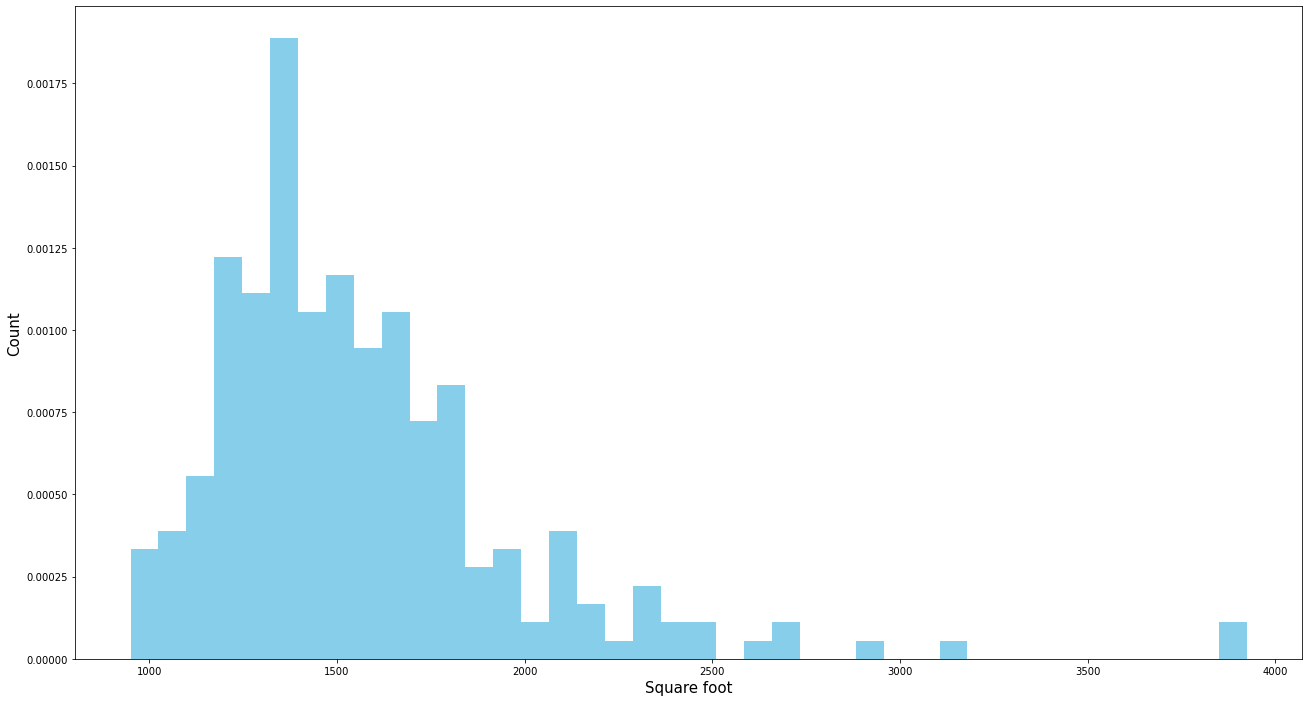

In [70]:
# Distribution of mean value of Total Sqft grouped by location.
plt.hist(describe_df['total_sqft']['mean'],bins = 40, color = 'skyblue', density = True )
plt.xlabel('Square foot', size = 15)
plt.ylabel('Count', size = 15)
# Observation - Maximum flats are in the range of 1200 - 1400 sqft

Text(0, 0.5, 'Count')

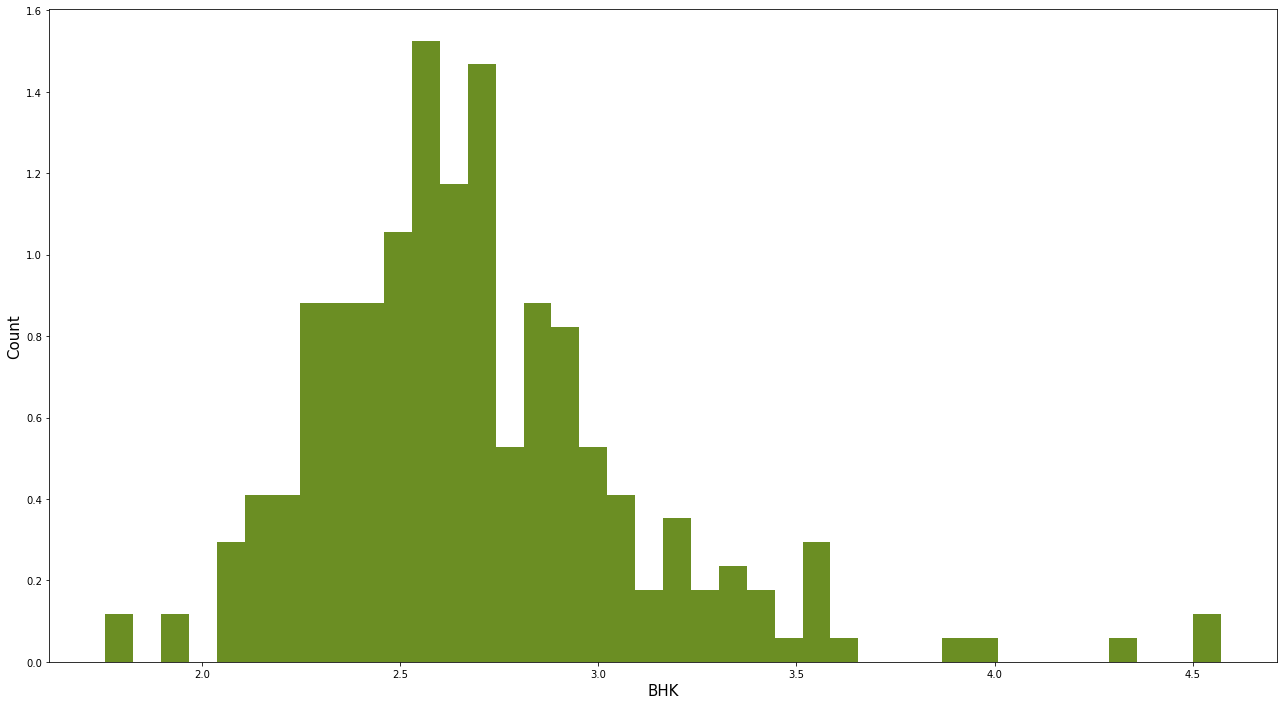

In [71]:
# Distribution of mean value of BHK grouped by location.
plt.hist(describe_df['BHK']['mean'],bins = 40, color = 'olivedrab', density = True )
plt.xlabel('BHK', size = 15)
plt.ylabel('Count', size = 15)
# Observation - 2 to 3 BHK flats dominate the distribution.

Text(0, 0.5, 'Count')

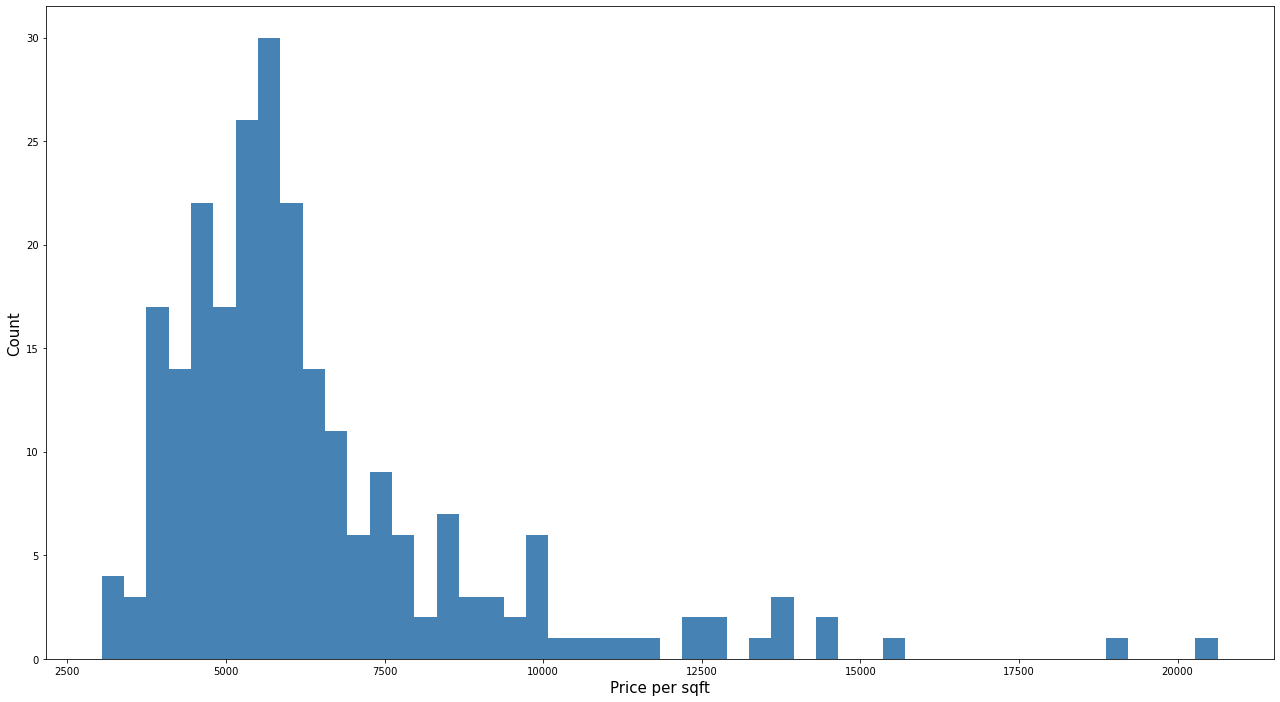

In [72]:
# Distribution of mean value of Price Per sqft grouped by location.
plt.hist(describe_df['Price_Per_sqft']['mean'],bins = 50, color = 'steelblue' )
plt.xlabel('Price per sqft', size = 15)
plt.ylabel('Count', size = 15)
# Observation - Average Price per square foot is in the range of Rs. 5000 to Rs. 6000.

Text(0, 0.5, 'Count')

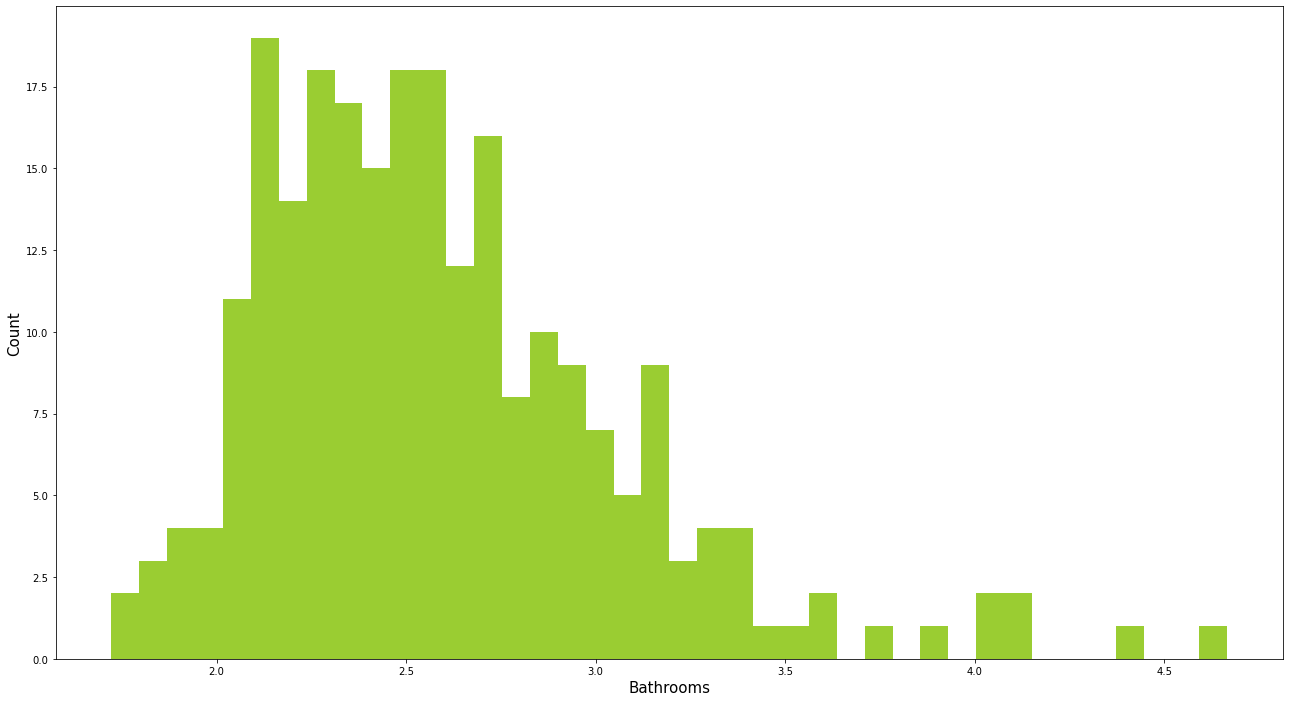

In [73]:
# Distribution of mean value of baths grouped by location.
plt.hist(describe_df['bath']['mean'],bins = 40, color = 'yellowgreen' )
plt.xlabel('Bathrooms', size = 15)
plt.ylabel('Count', size = 15)
# Observation - Maximum households have 2 to 3 bathrooms.

In [74]:
# Filtering out price per squarefoot data.
# Keeping only those data that lies within the Mean and one Standard Deviation on either side.
# These outliers has to be removed.

def remove_price_per_square_foot_outlier(df):
    df_out = pd.DataFrame()
    for key,sub_df in df.groupby('location'):
        
        m = np.mean(sub_df.Price_Per_sqft) #Mean of Price Per Square foot column.
        sd  =np.std(sub_df.Price_Per_sqft) #Standard Deviation of Price Per Square foot column.
        reduced_df = sub_df[(sub_df.Price_Per_sqft>(m-sd)) & (sub_df.Price_Per_sqft<=(m+sd))] 
        # Keeping those values that are in the range of 1 SD from the mean.
        df_out = pd.concat([df_out,reduced_df], ignore_index = True)
        
    return df_out
df6 = remove_price_per_square_foot_outlier(df5)
df6.shape #Displaying the Shape

(10241, 7)

In [75]:
#Outlier data removed, removing data beyond one standard deviation.
df5.shape[0] - df6.shape[0]
# Below we see the number of datapoints removed. We can change and include more datapoints.
# Say till 1.5 to 2 SD but for my analysis I have considered only 1 SD.

2261

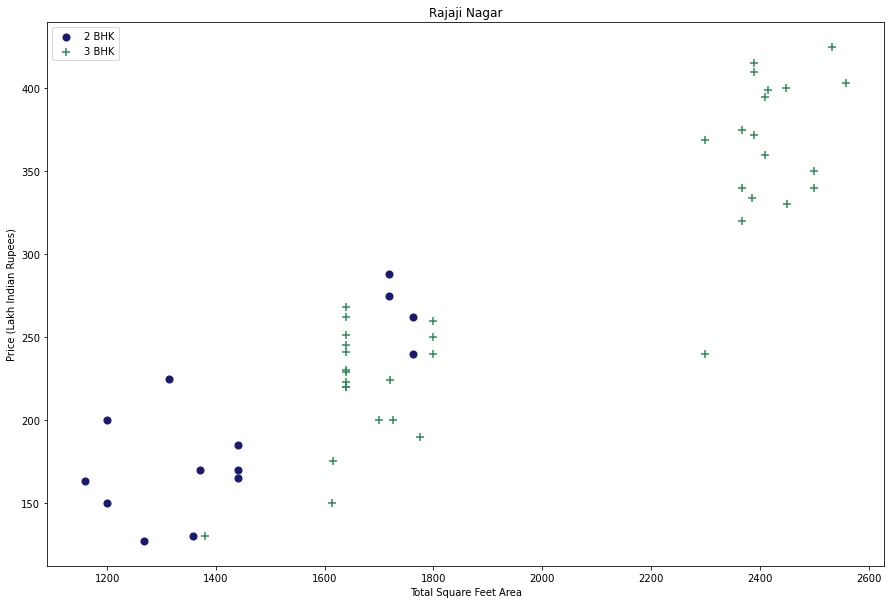

In [76]:
# Certain Data Points have same sqft 3BHK flats priced less than 2BHK flats. These are outliers and have to be removed.
# BHK is an important criterion for determining flat price. 
# For same sqft if number of BHK is more the on with more BHK will have more price.
# We'll do it location wise and later apply on the entire dataframe locationwise and observe the desired changes.

def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.BHK==2)]  #Finding 2BHK flats
    bhk3 = df[(df.location==location) & (df.BHK==3)]  #Finding 3BHK flats
    matplotlib.rcParams['figure.figsize'] = (15,10)
    
    plt.scatter(bhk2.total_sqft,bhk2.price,color='midnightblue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='seagreen',label='3 BHK', s=50)
    
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df6,"Rajaji Nagar") #Plotting the scatterplot for Rajaji Nagar

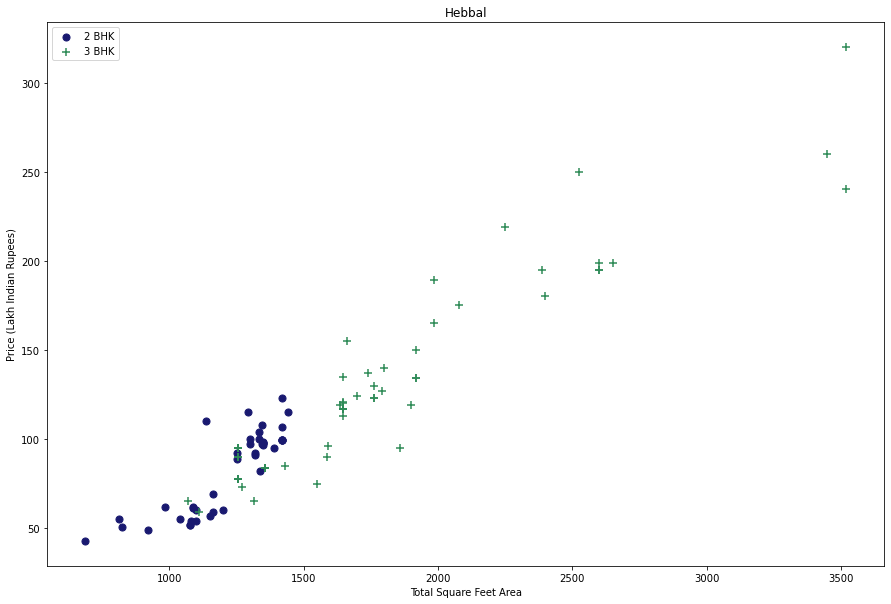

In [77]:
#Plotting the same for Hebbal
plot_scatter_chart(df6,"Hebbal")

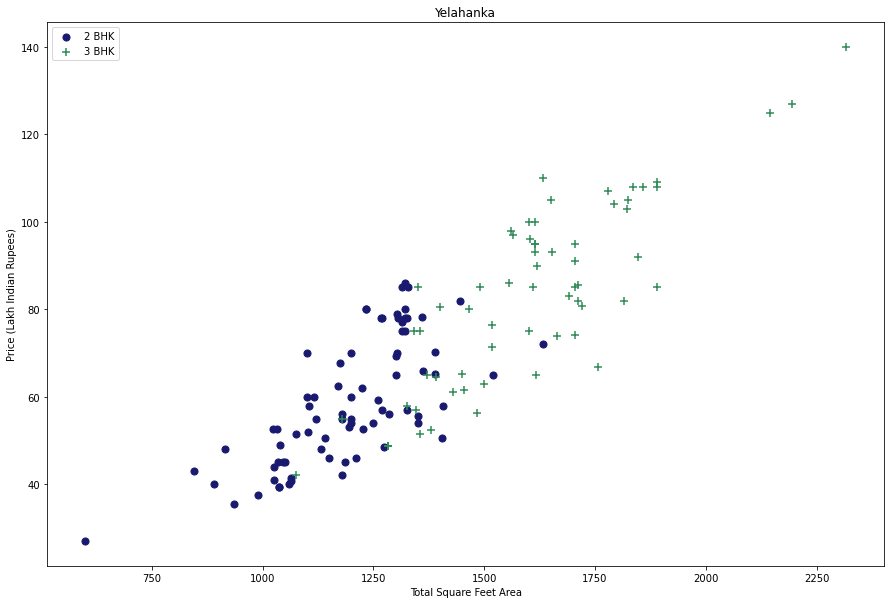

In [78]:
#Plotting the same for Yelahanka
plot_scatter_chart(df6,"Yelahanka")

In [79]:
df6['location'].value_counts().sort_values(ascending = False)

Other Location        2301
Whitefield             479
Sarjapur  Road         296
Electronic City        279
Kanakpura Road         190
                      ... 
HAL 2nd Stage            4
Banjara Layout           4
Vishwapriya Layout       4
Thyagaraja Nagar         4
Marsur                   3
Name: location, Length: 242, dtype: int64

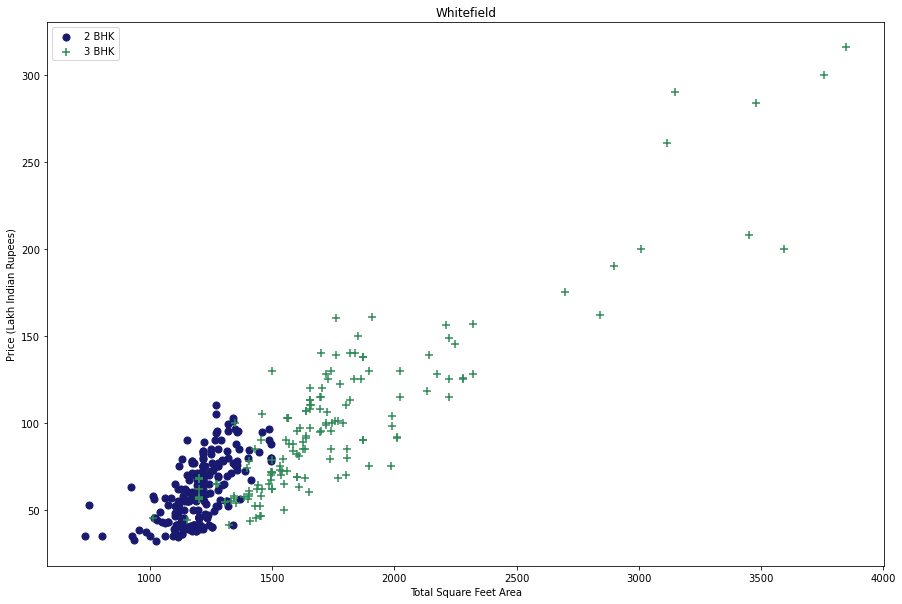

In [80]:
#Plotting the same for Whitefield
plot_scatter_chart(df6,"Whitefield")

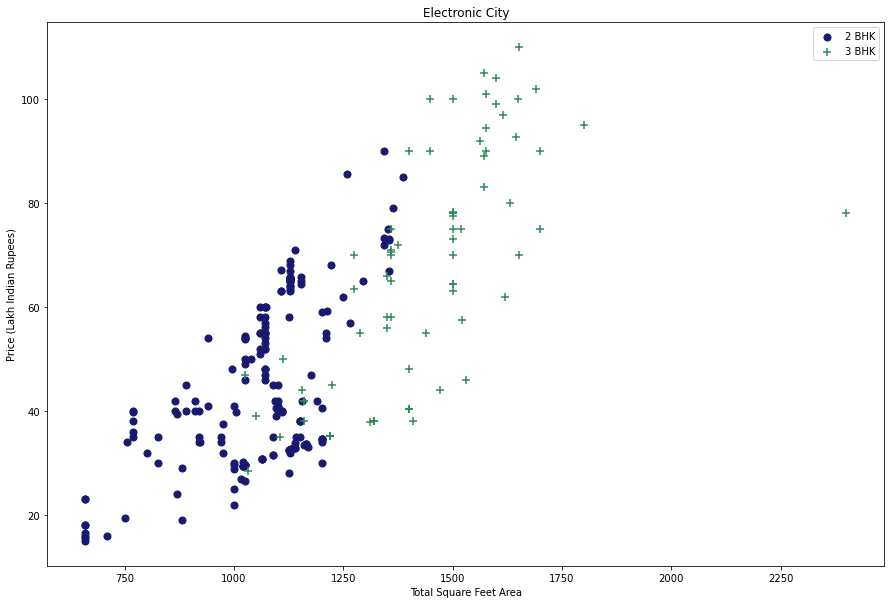

In [81]:
#Plotting the same for Electronic City
plot_scatter_chart(df6,"Electronic City")

In [82]:
#2BHK flat should have price lesser than 3BHK of same sqft.
#Filtering out all those values of say 2BHK whose price per squarefoot is less than 1BHK.

In [83]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.Price_Per_sqft),
                'std': np.std(bhk_df.Price_Per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_Per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)
#df8 = df7.copy()
df7.shape

(7329, 7)

In [84]:
#Total number of anomalies removes
df6.shape[0] - df7.shape[0]

2912

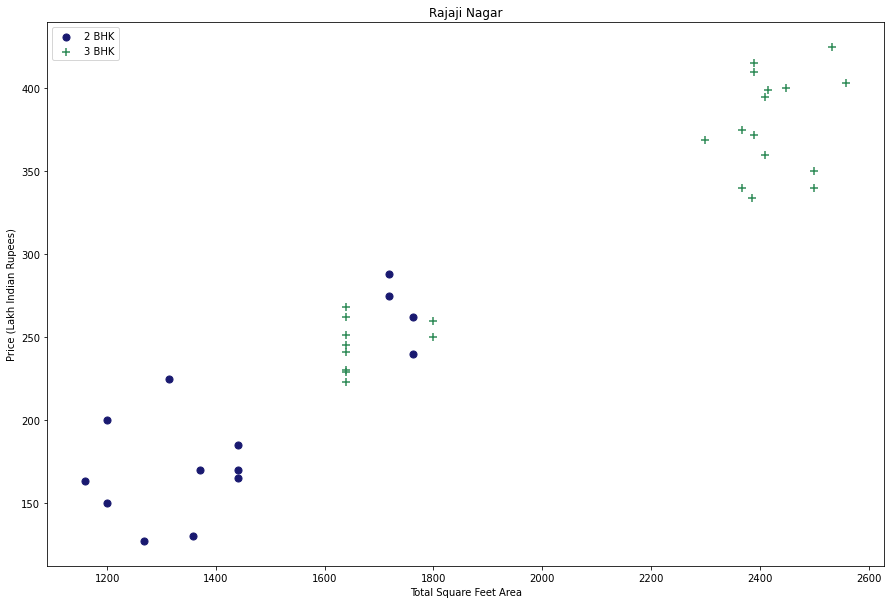

In [85]:
plot_scatter_chart(df7,"Rajaji Nagar") #Plotting the scatterplot for Rajaji Nagar

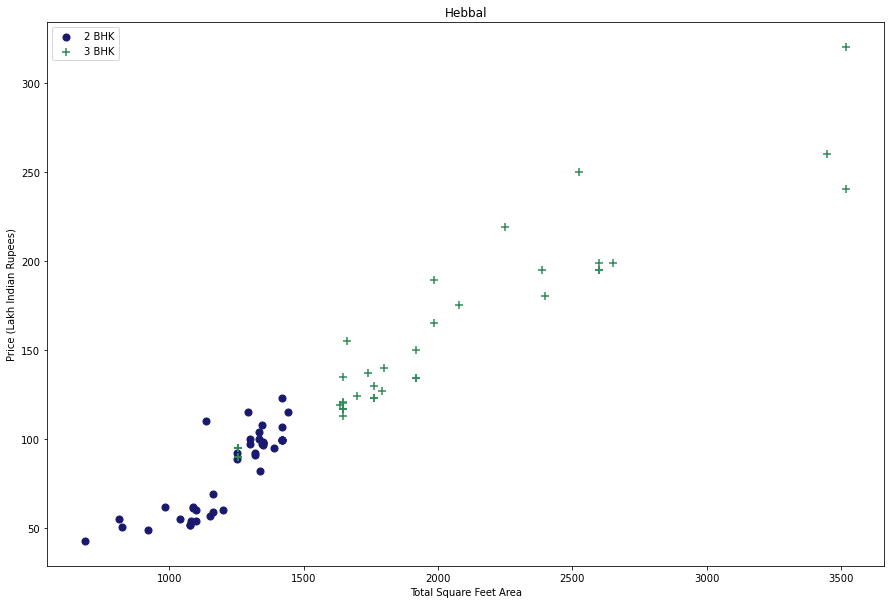

In [86]:
#Plotting the same for Hebbal
plot_scatter_chart(df7,"Hebbal")

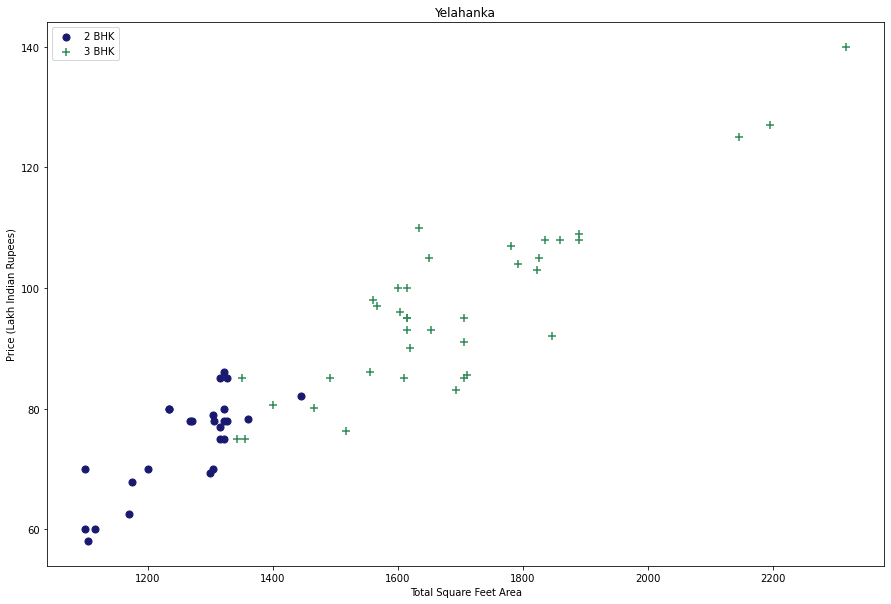

In [87]:
#Plotting the same for Yelahanka
plot_scatter_chart(df7,"Yelahanka")

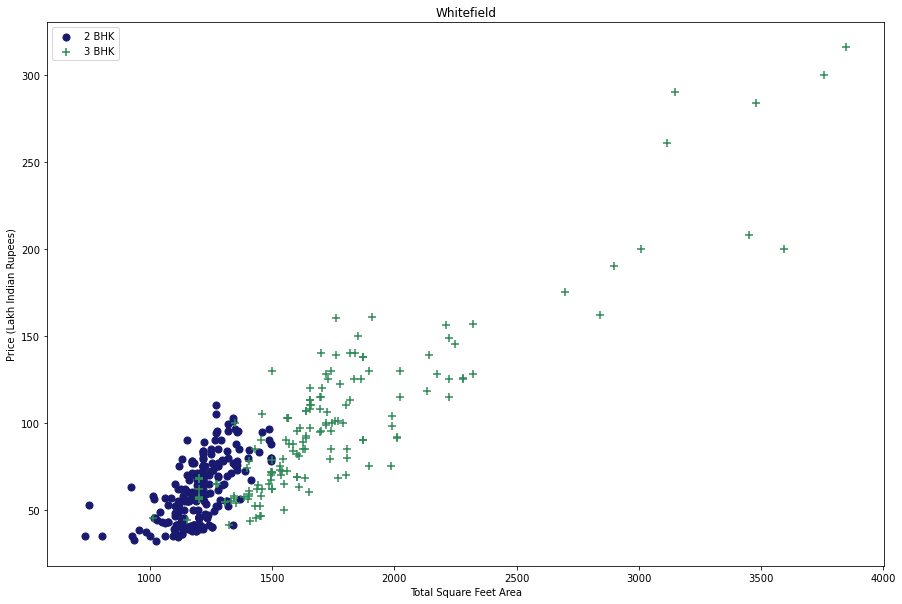

In [88]:
#Plotting the same for Whitefield
plot_scatter_chart(df6,"Whitefield")

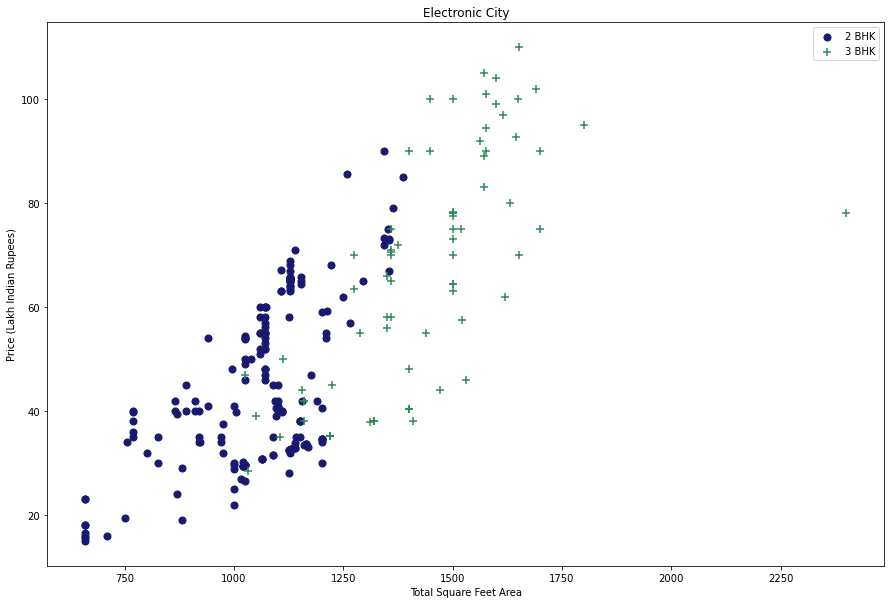

In [89]:
#Plotting the same for Electronic City
plot_scatter_chart(df6,"Electronic City")

Text(0, 0.5, 'Count')

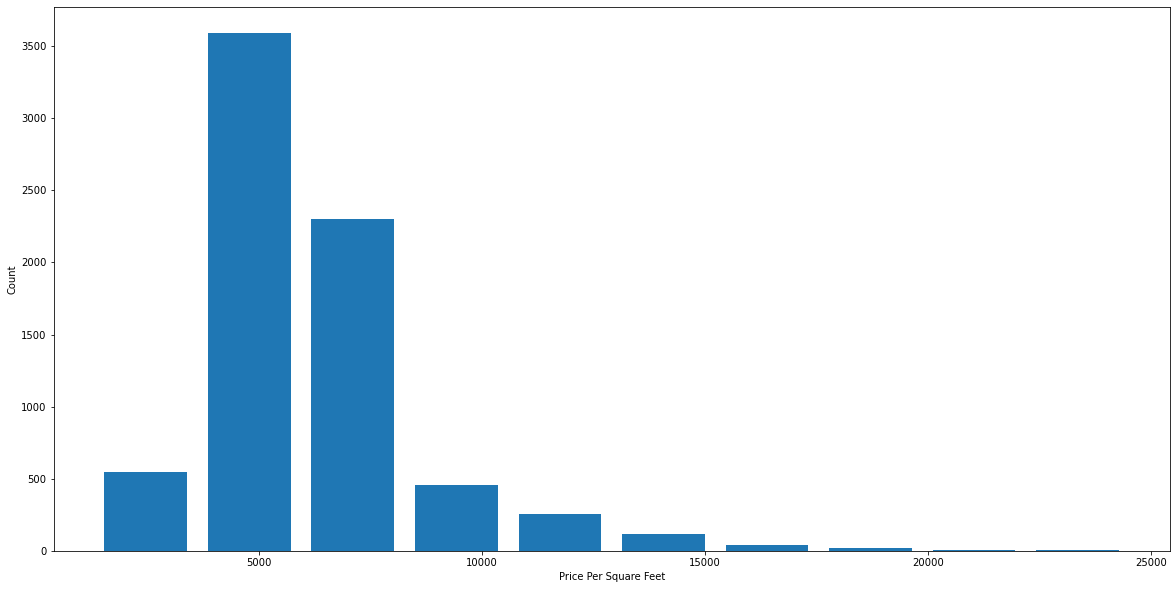

In [90]:
# Observing the cleaned Price Per Square Foot count distribution.
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df7.Price_Per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

### Removing bathroom specific outliers.

In [91]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [92]:
df7[df7['bath']>10]

,location,size,total_sqft,bath,price,BHK,Price_Per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
5925,Other Location,10 BHK,12000.0,12.0,525.0,10,4375.000000
6014,Other Location,16 BHK,10000.0,16.0,550.0,16,5500.000000
6747,Other Location,11 BHK,6000.0,12.0,150.0,11,2500.000000
7078,Other Location,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

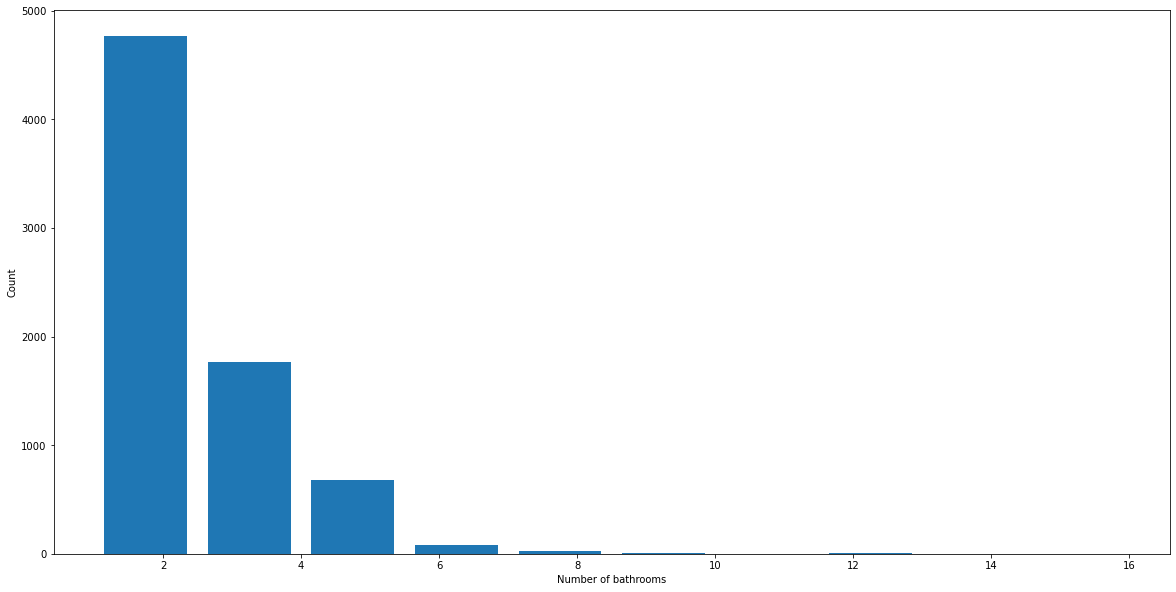

In [93]:
plt.hist(df7.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [94]:
#Domain Knowledge : Any time we have bathrooms greater than bedroom+2 remove those outliers.
df7[df7.bath>df7.BHK+2]
# Eg1. 4Bedrom 7 bathroms -  outlier. unusual
# Eg1. 6 bedrooms and 9 bathrooms - outlier. unusual.

,location,size,total_sqft,bath,price,BHK,Price_Per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
5850,Other Location,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9012,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [95]:
df8 = df7[df7.bath<df7.BHK+2]
df8.shape

(7251, 7)

In [96]:
#Dropping other unnecessary features for model. Remain only with location, total_sqft, bath, price and BHK.
df10 = df8.drop(['size','Price_Per_sqft'],axis='columns')
df10.head(3)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3


In [97]:
#Location is a categorical column, need to convert it to a numerical using one hot encoding ---> dummies.
#Using pd.get_dummies() method.
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [98]:
# Getting rid of the dummy variabe trap. Dropping the categorical column for 'Other Location' type.
df11 = pd.concat([df10,dummies.drop('Other Location',axis ='columns')],axis ='columns')
df11.head(3)

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
#Replaced location by one hot encoding. Now we can drop location column now as we have it's encoded columns.
df12 = df11.drop('location',axis= 'columns')
df12.head(3)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
#Checking shape of X.
df12.shape
# We have 7251 rows and 245 columns respectively after encoding.

(7251, 245)

In [101]:
# X is our independent variables. Price is what we want to predict based on total_sqft, bath and BHK.
X = df12.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,Abbigere,...,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [102]:
# Shape of Independent feature dataframe
X.shape

(7251, 244)

In [103]:
# y is our dependent variables. Dependent on location, total_sqft, BHK and bath.
y = df12.price
y.head(5)

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [104]:
# Checking length of y.
len(y)

7251

# Training and Testing the Model

In [105]:
# Splitting our dataset in training and testing dataset using sklearn's train_test_split method.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [109]:
# Importing sklearn's Linear Regression model and fitting and training the model. Testing the same model and displaying the score.
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8691914452174361

In [107]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85430675, 0.84187647, 0.84728412, 0.85171729, 0.87168018])

# Identifying the best Model. Comapring Linear Regression, Lasso, DT and KN Regressor.

In [108]:
import random
random.seed(42)
# Best Model Selection using GridSearch CV

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'Linear Regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'Lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'Decision Tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
                
            }
        },
        'KNN Regression' :{
            'model' : KNeighborsRegressor(),
            'params' : {
                'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],
                'weights' : ['uniform', 'distance']
            }
        }   
        }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'Model': algo_name,
            'Best_score': gs.best_score_,
            'Best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['Model','Best_score','Best_params'])

find_best_model_using_gridsearchcv(X,y)

,Model,Best_score,Best_params
0,Linear Regression,0.853373,{'normalize': False}
1,Lasso,0.727552,"{'alpha': 1, 'selection': 'random'}"
2,Decision Tree,0.691026,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
3,KNN Regression,0.709210,"{'n_neighbors': 13, 'weights': 'uniform'}"


In [110]:
# Predict price function that predicts flat price based on location, sqft, bath and bhk using our model's prediction.
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [111]:
# Final Dataframe
df12.head(5)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Uttarahalli,Varthur,Varthur Road,Vasanthapura,Vidyaranyapura,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Predicting some flat values - based on Location, Sqft, BHK and Bathrooms. 

In [112]:
print(round(predict_price('1st Phase JP Nagar',1000, 2, 2),2),'Lakhs')

82.82 Lakhs


In [113]:
print(round(predict_price('1st Phase JP Nagar',2000, 3, 3),2),'Lakhs')

168.11 Lakhs


In [114]:
print(round(predict_price('Indira Nagar',2000, 3, 3),2),'Lakhs')

264.66 Lakhs


In [115]:
print(round(predict_price('Indira Nagar',2500, 3, 3),2),'Lakhs')

308.15 Lakhs


In [116]:
print(round(predict_price('5th Block Hbr Layout',8000, 6, 4),2),'Lakhs')

617.4 Lakhs


In [117]:
print(round(predict_price('5th Block Hbr Layout',3500, 4, 3),2),'Lakhs')

226.23 Lakhs


In [118]:
print(round(predict_price('Varthur',1600, 3, 2),2),'Lakhs')

91.8 Lakhs


In [119]:
print(round(predict_price('Vishveshwarya Layout',2000, 3, 3),2),'Lakhs')

98.39 Lakhs


In [120]:
print(round(predict_price('Whitefield',1500, 2, 2),2),'Lakhs')

93.49 Lakhs


In [121]:
print(round(predict_price('6th Phase JP Nagar',1250, 3, 2),2),'Lakhs')

83.92 Lakhs


# Conclusion
As always said in the world of data science. Data Preparation is the most vital, crucial and tedious step for any project. Identifying the type of problem and later applying suitable models might be bit easier with a plethora of functionalities available with standard libraries. Yet domain knowledge plays a very vital role in scaling up these tasks. I had a wonderful data preparation experience with this real world dataset and will use the knowledge gained in my upcoming projects as well. Data preparation and EDA is the major part. Then comes understanding the models and getting the most optimum model out of them all.
Thank You,
Regards
Abhilash Jash